<a href="https://colab.research.google.com/github/NikethnaSri-AI/Aanseaa_Technologies_Internship/blob/main/EDA_VideoGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('vgchartz-2024.csv')

In [ ]:
print(df.isnull().sum())

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [ ]:
print(df.head())

                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

In [ ]:
duplicates = df.duplicated().sum()
print(duplicates)


0


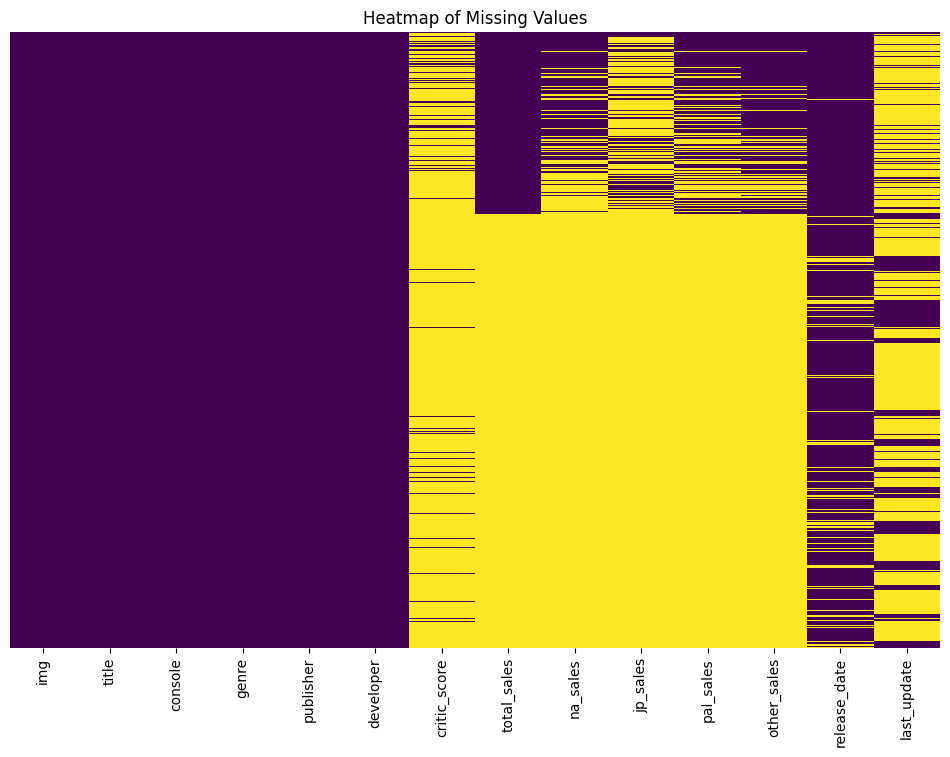

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()


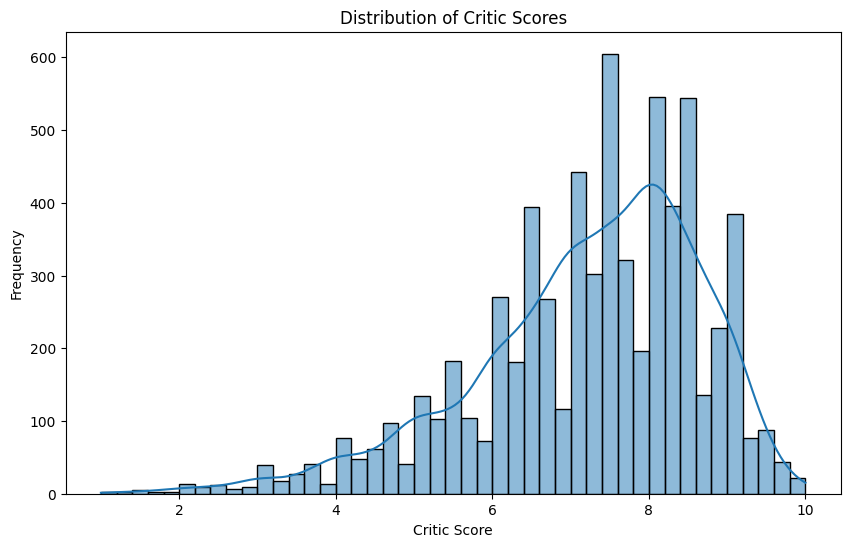

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['critic_score'].dropna(), kde=True)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

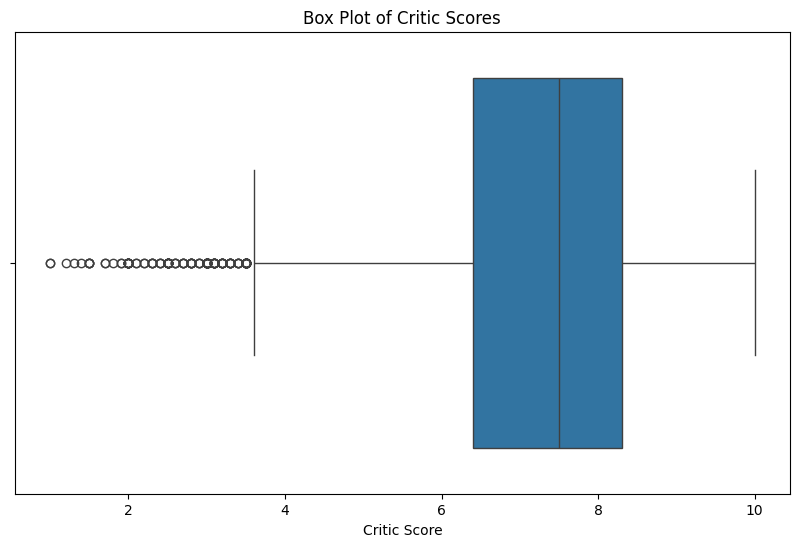

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['critic_score'])
plt.title('Box Plot of Critic Scores')
plt.xlabel('Critic Score')
plt.show()

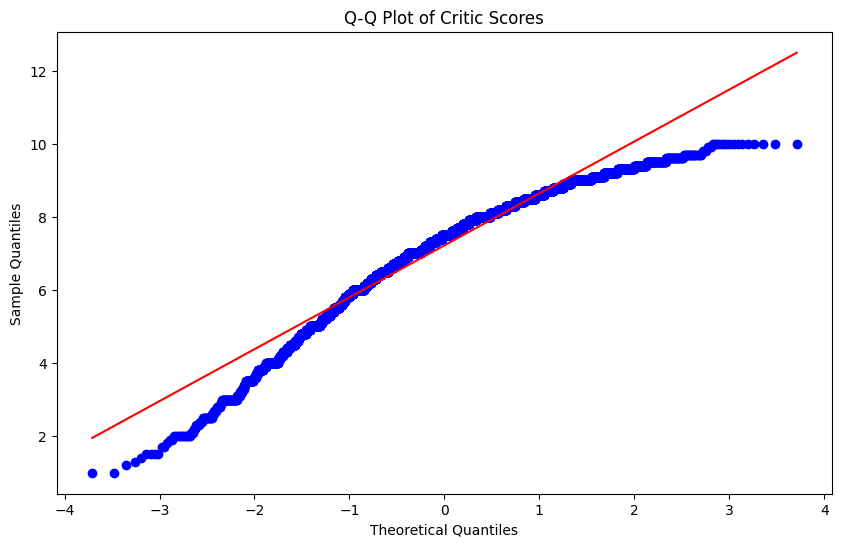

In [ ]:
from scipy import stats
plt.figure(figsize=(10, 6))
stats.probplot(df['critic_score'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Critic Scores')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [ ]:
desc_stats = df['critic_score'].describe()
print(desc_stats)

count    6678.000000
mean        7.220440
std         1.457066
min         1.000000
25%         6.400000
50%         7.500000
75%         8.300000
max        10.000000
Name: critic_score, dtype: float64


In [ ]:
skewness = df['critic_score'].skew()
kurtosis = df['critic_score'].kurt()
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Skewness: -0.9106368591089398
Kurtosis: 0.828947999664281


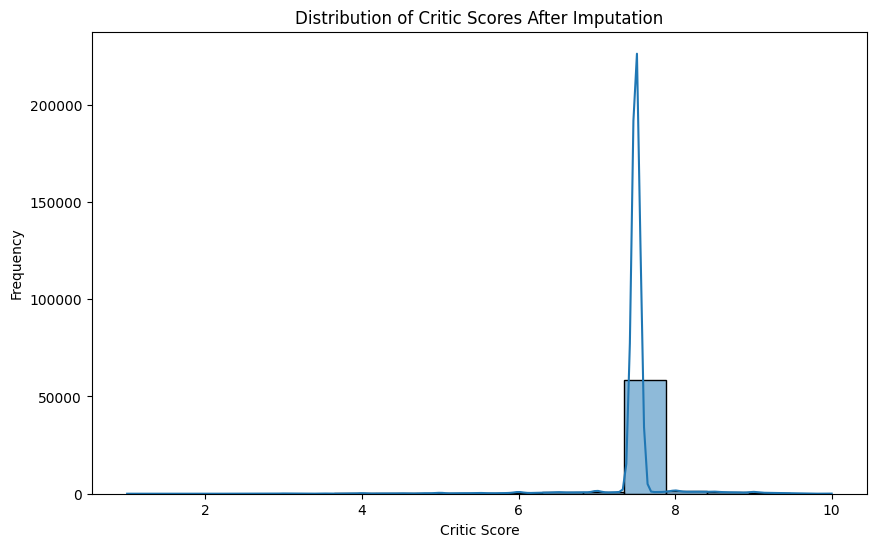

In [ ]:
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['critic_score'], kde=True)
plt.title('Distribution of Critic Scores After Imputation')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
def plot_eda(feature):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature].dropna())
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()
    print(f'Descriptive Statistics for {feature}:')
    print(df[feature].describe())
    print()

    print(f'Skewness for {feature}: {df[feature].skew()}')
    print(f'Kurtosis for {feature}: {df[feature].kurt()}')
    print()


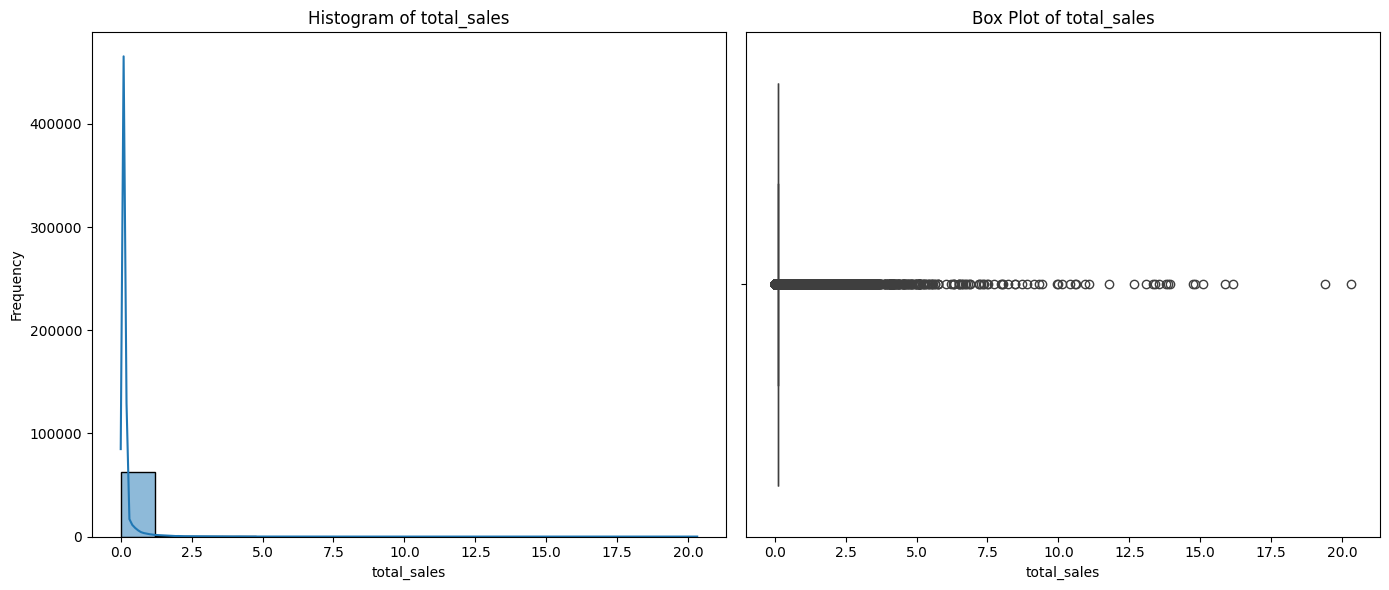

Descriptive Statistics for total_sales:
count    63999.000000
mean         0.187744
std          0.451323
min          0.000000
25%          0.120000
50%          0.120000
75%          0.120000
max         20.320000
Name: total_sales, dtype: float64

Skewness for total_sales: 15.882592430208213
Kurtosis for total_sales: 408.2936642671757



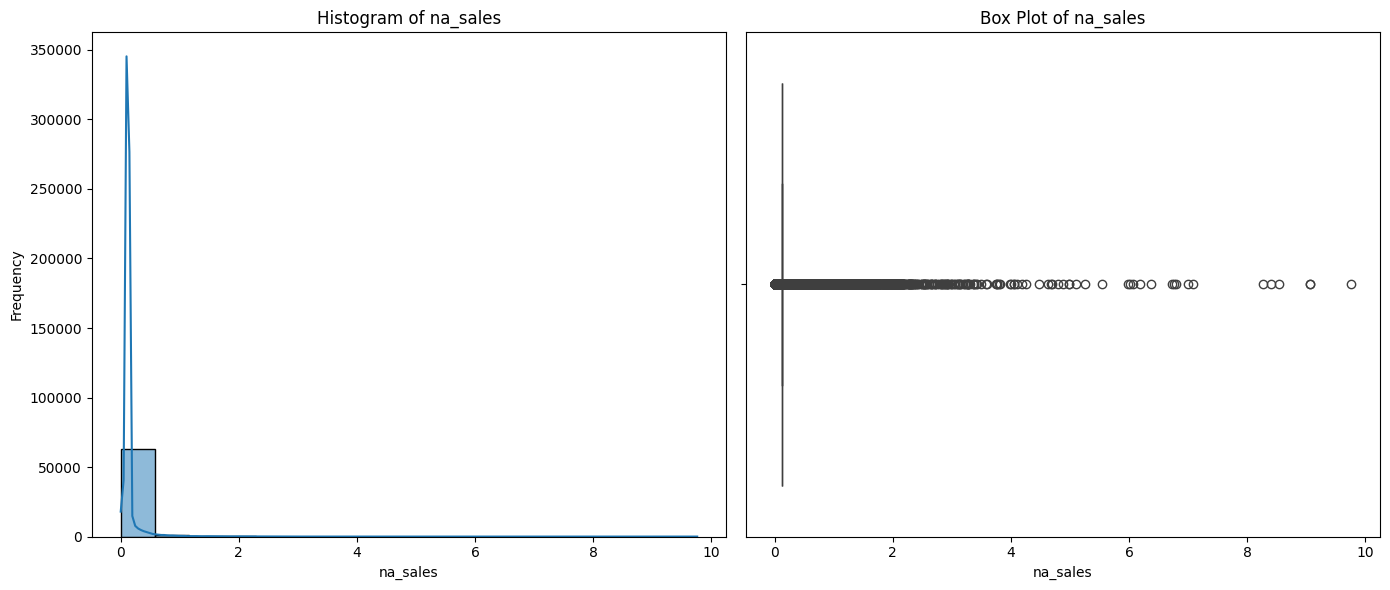

Descriptive Statistics for na_sales:
count    63999.000000
mean         0.148580
std          0.227281
min          0.000000
25%          0.120000
50%          0.120000
75%          0.120000
max          9.760000
Name: na_sales, dtype: float64

Skewness for na_sales: 15.510207282861503
Kurtosis for na_sales: 389.06639251521926



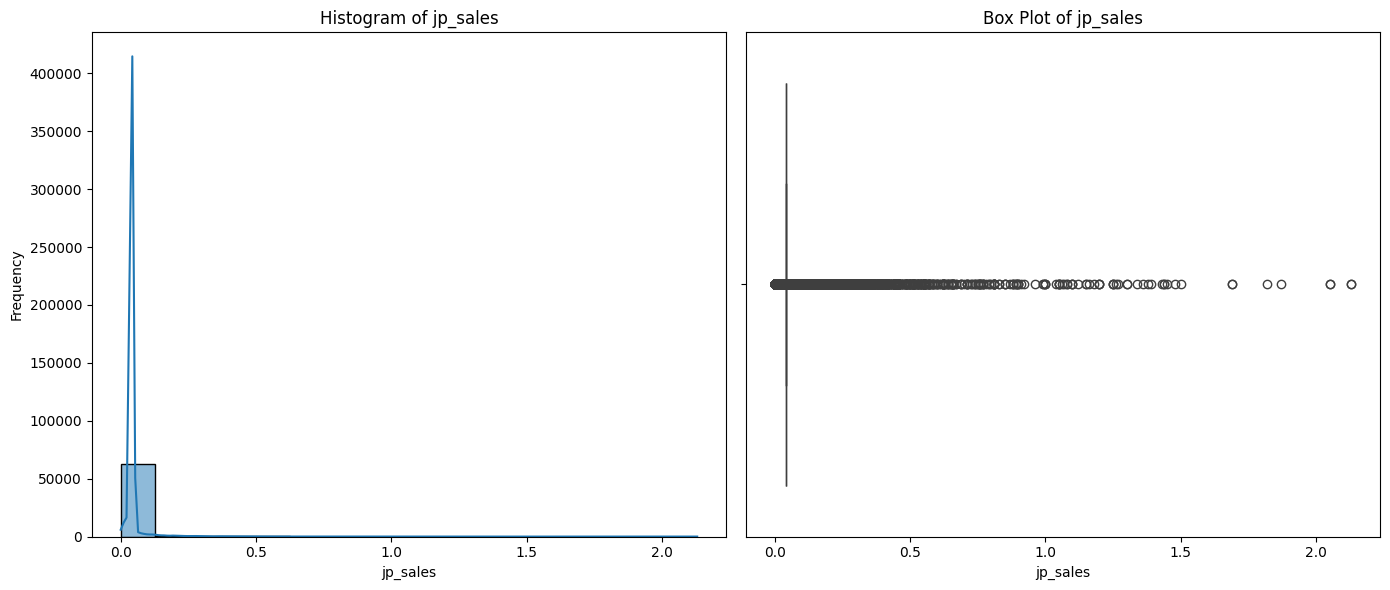

Descriptive Statistics for jp_sales:
count    63999.000000
mean         0.046545
std          0.057960
min          0.000000
25%          0.040000
50%          0.040000
75%          0.040000
max          2.130000
Name: jp_sales, dtype: float64

Skewness for jp_sales: 14.31896992477173
Kurtosis for jp_sales: 300.2112149330615



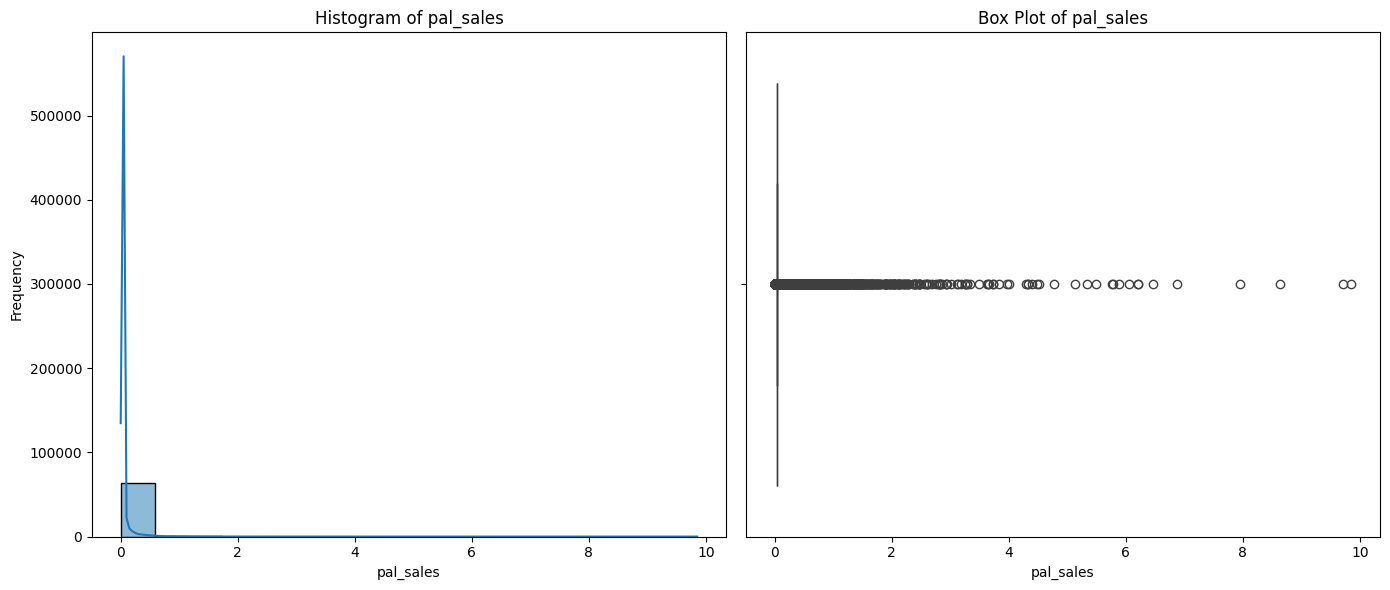

Descriptive Statistics for pal_sales:
count    63999.000000
mean         0.061938
std          0.181140
min          0.000000
25%          0.040000
50%          0.040000
75%          0.040000
max          9.850000
Name: pal_sales, dtype: float64

Skewness for pal_sales: 20.948942321227534
Kurtosis for pal_sales: 700.3865861773992



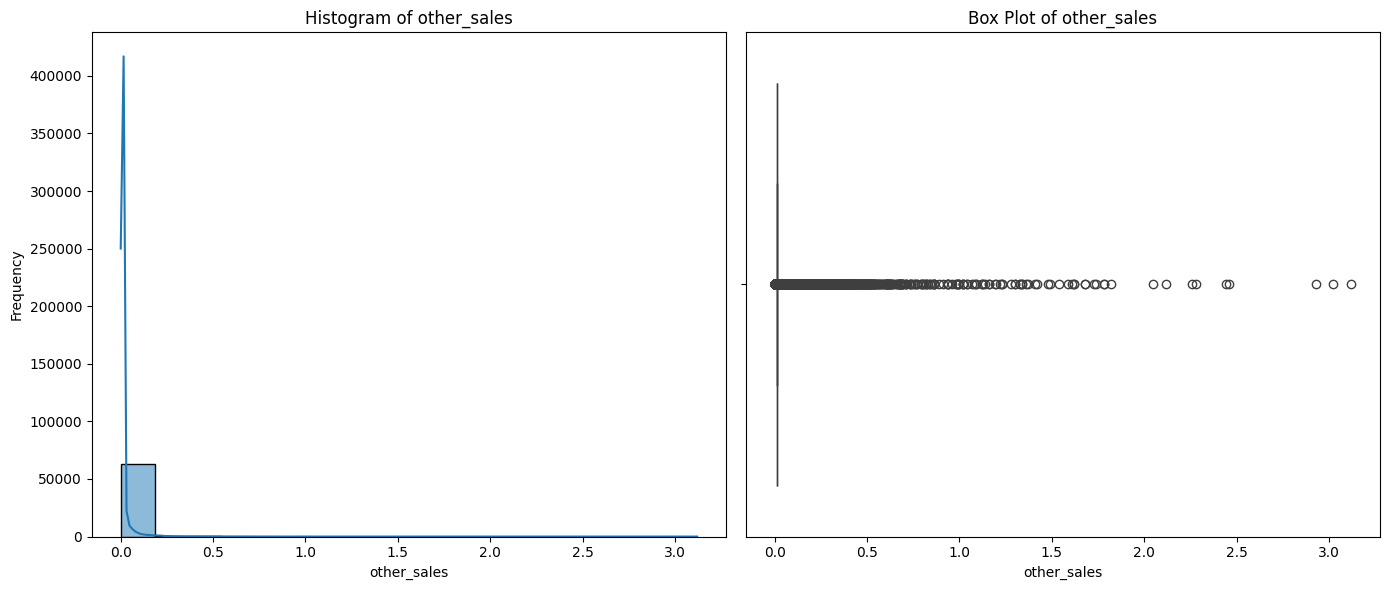

Descriptive Statistics for other_sales:
count    63999.000000
mean         0.017810
std          0.063151
min          0.000000
25%          0.010000
50%          0.010000
75%          0.010000
max          3.120000
Name: other_sales, dtype: float64

Skewness for other_sales: 19.8226905289466
Kurtosis for other_sales: 591.4126636580113



In [ ]:
for feature in ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    plot_eda(feature)

In [ ]:
for feature in ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    df[feature].fillna(df[feature].median(), inplace=True)


In [ ]:
df.dropna(subset=['developer'], inplace=True)

In [ ]:
df['release_date'].fillna(method='ffill', inplace=True)
df['last_update'].fillna(method='bfill', inplace=True)


In [ ]:
print(df.isnull().sum())

img                              0
title                            0
console                          0
genre                            0
publisher                        0
developer                        0
critic_score                     0
total_sales                      0
na_sales                         0
jp_sales                         0
pal_sales                        0
other_sales                      0
release_date                     0
last_update                      0
average_critic_score_by_genre    0
release_year                     0
total_sales_per_genre            0
total_sales_per_console          0
dtype: int64


In [ ]:
average_score_by_genre = df.groupby('genre')['critic_score'].mean().reset_index()
average_score_by_genre.rename(columns={'critic_score': 'average_critic_score_by_genre'}, inplace=True)
df = df.merge(average_score_by_genre, on='genre', how='left')
print(average_score_by_genre.head())


              genre  average_critic_score_by_genre
0            Action                       6.831008
1  Action-Adventure                       7.678378
2         Adventure                       7.341058
3        Board Game                       5.300000
4         Education                       7.750000


In [ ]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
yearly_sales = df.groupby('release_year')['total_sales'].sum().reset_index()
yearly_sales.rename(columns={'total_sales': 'annual_sales'}, inplace=True)
print(yearly_sales)

    release_year  annual_sales
0           1971          0.12
1           1973          0.12
2           1975          0.12
3           1977          3.70
4           1978          7.28
5           1979          1.27
6           1980          7.18
7           1981         14.09
8           1982         58.39
9           1983         67.68
10          1984         17.93
11          1985         15.03
12          1986         29.31
13          1987         40.51
14          1988         45.09
15          1989         62.52
16          1990         93.91
17          1991        105.05
18          1992        123.50
19          1993        147.24
20          1994        172.21
21          1995        175.86
22          1996        227.06
23          1997        205.73
24          1998        233.29
25          1999        287.35
26          2000        316.68
27          2001        350.03
28          2002        424.87
29          2003        417.24
30          2004        390.84
31      

In [ ]:
df = df.dropna(subset=['genre', 'total_sales'])
df['total_sales_per_genre'] = df['total_sales'] / df.groupby('genre')['total_sales'].transform('count')
print(df[['genre', 'total_sales', 'total_sales_per_genre']].head(5))

     genre  total_sales  total_sales_per_genre
0   Action        20.32               0.002375
1   Action        19.39               0.002266
2   Action        16.15               0.001888
3   Action        15.86               0.001854
4  Shooter        15.09               0.002791


In [ ]:
df = df.dropna(subset=['console', 'total_sales'])
df['total_sales_per_console'] = df['total_sales'] / df.groupby('console')['total_sales'].transform('count')
print(df[['console', 'total_sales', 'total_sales_per_console']].head(5))
print(df.isnull().sum())

  console  total_sales  total_sales_per_console
0     PS3        20.32                 0.010667
1     PS4        19.39                 0.006737
2     PS2        16.15                 0.004530
3    X360        15.86                 0.009141
4     PS4        15.09                 0.005243
img                              0
title                            0
console                          0
genre                            0
publisher                        0
developer                        0
critic_score                     0
total_sales                      0
na_sales                         0
jp_sales                         0
pal_sales                        0
other_sales                      0
release_date                     0
last_update                      0
average_critic_score_by_genre    0
release_year                     0
total_sales_per_genre            0
total_sales_per_console          0
dtype: int64


In [ ]:
df[['critic_score', 'total_sales', 'jp_sales', 'pal_sales', 'other_sales', 'average_critic_score_by_genre', 'total_sales_per_genre']].describe()

,critic_score,total_sales,jp_sales,pal_sales,other_sales,average_critic_score_by_genre,total_sales_per_genre
count,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000
mean,7.470829,0.187744,0.046545,0.061938,0.017810,7.195567,0.000055
std,0.478334,0.451323,0.057960,0.181140,0.063151,0.285802,0.000456
min,1.000000,0.000000,0.000000,0.000000,0.000000,5.300000,0.000000
25%,7.500000,0.120000,0.040000,0.040000,0.010000,6.884593,0.000014
50%,7.500000,0.120000,0.040000,0.040000,0.010000,7.276800,0.000021
75%,7.500000,0.120000,0.040000,0.040000,0.010000,7.341058,0.000034
max,10.000000,20.320000,2.130000,9.850000,3.120000,9.200000,0.094500


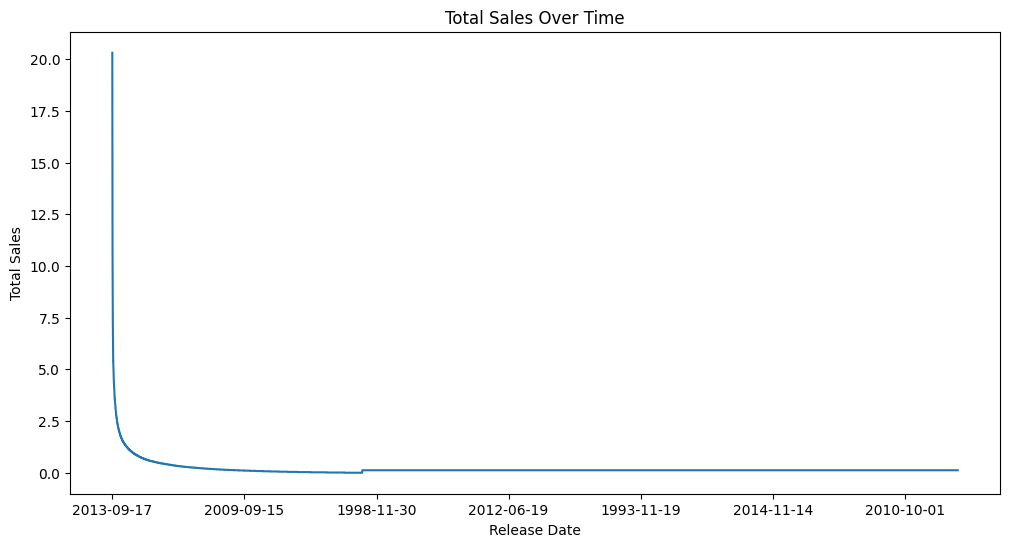

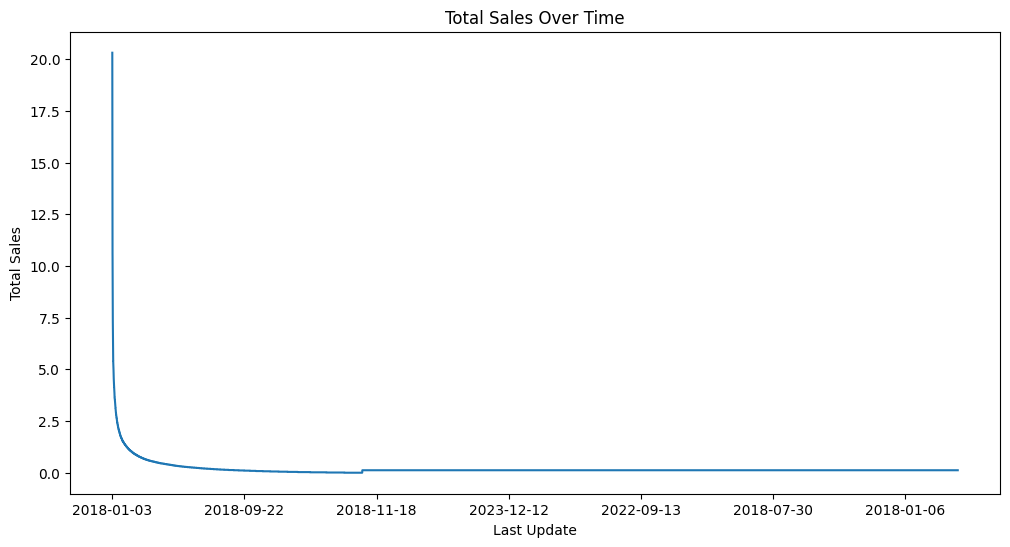

In [ ]:
plt.figure(figsize=(12, 6))
df.set_index('release_date')['total_sales'].plot(title='Total Sales Over Time')
plt.xlabel('Release Date')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
df.set_index('last_update')['total_sales'].plot(title='Total Sales Over Time')
plt.xlabel('Last Update')
plt.ylabel('Total Sales')
plt.show()


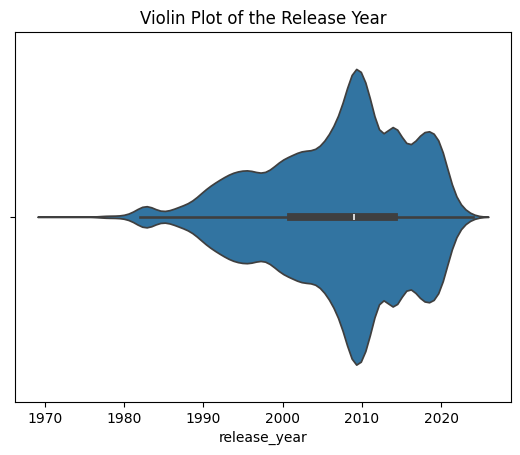

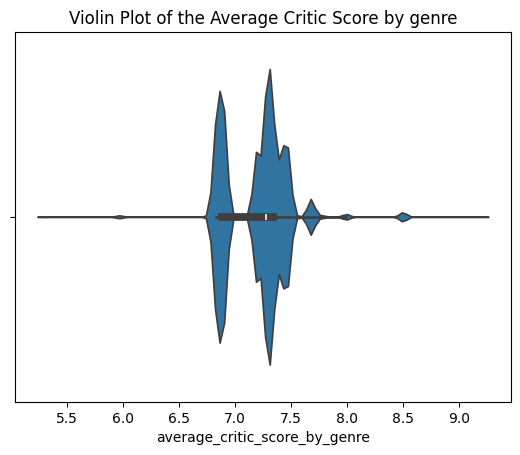

In [ ]:
sns.violinplot(x=df['release_year'])
plt.title('Violin Plot of the Release Year')
plt.show()
sns.violinplot(x=df['average_critic_score_by_genre'])
plt.title('Violin Plot of the Average Critic Score by genre')
plt.show()



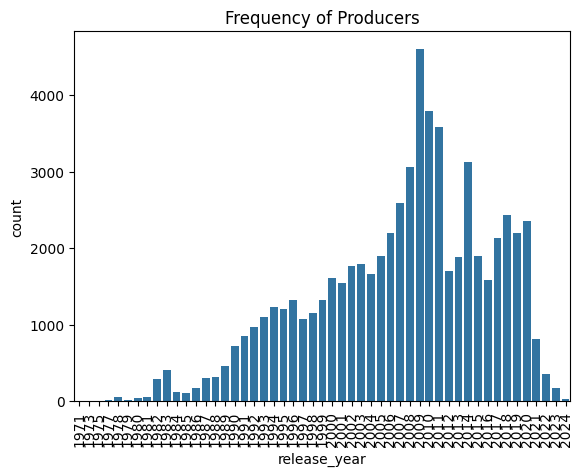

In [ ]:
sns.countplot(x=df['release_year'])
plt.title('Frequency of Producers')
plt.xticks(rotation=90)
plt.show()

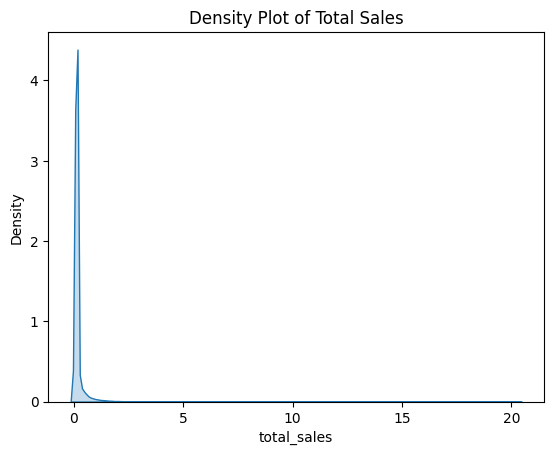

In [ ]:
sns.kdeplot(df['total_sales'], fill=True)
plt.title('Density Plot of Total Sales')
plt.show()


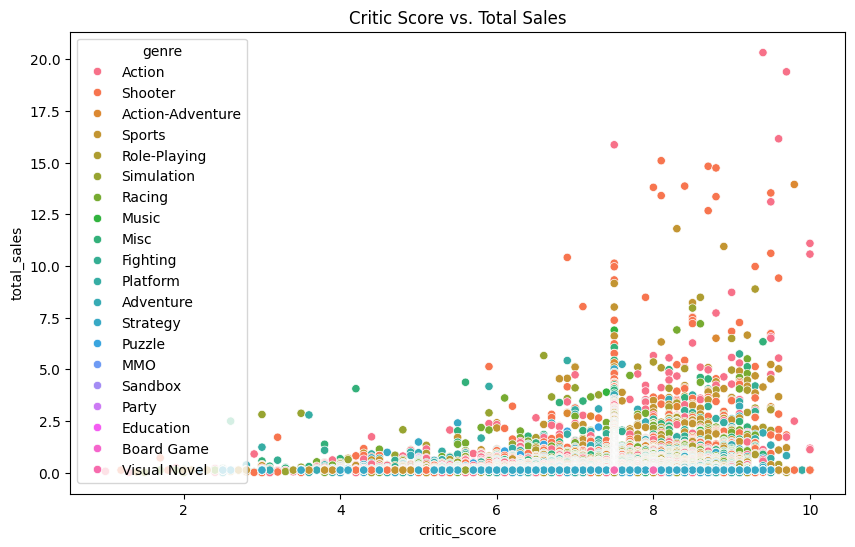

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', hue='genre', data=df)
plt.title('Critic Score vs. Total Sales')
plt.show()

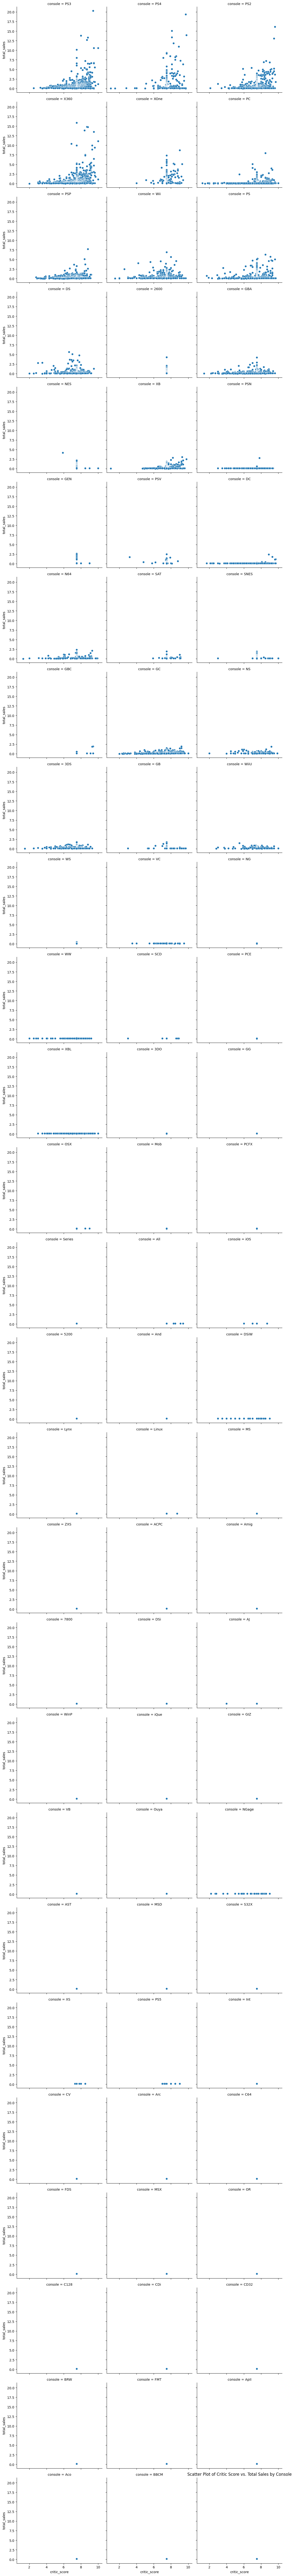

In [ ]:
g = sns.FacetGrid(df, col="console", col_wrap=3, height=4)
g.map(sns.scatterplot, 'critic_score', 'total_sales')
g.add_legend()
plt.title('Scatter Plot of Critic Score VS Total Sales by Console')
plt.show()

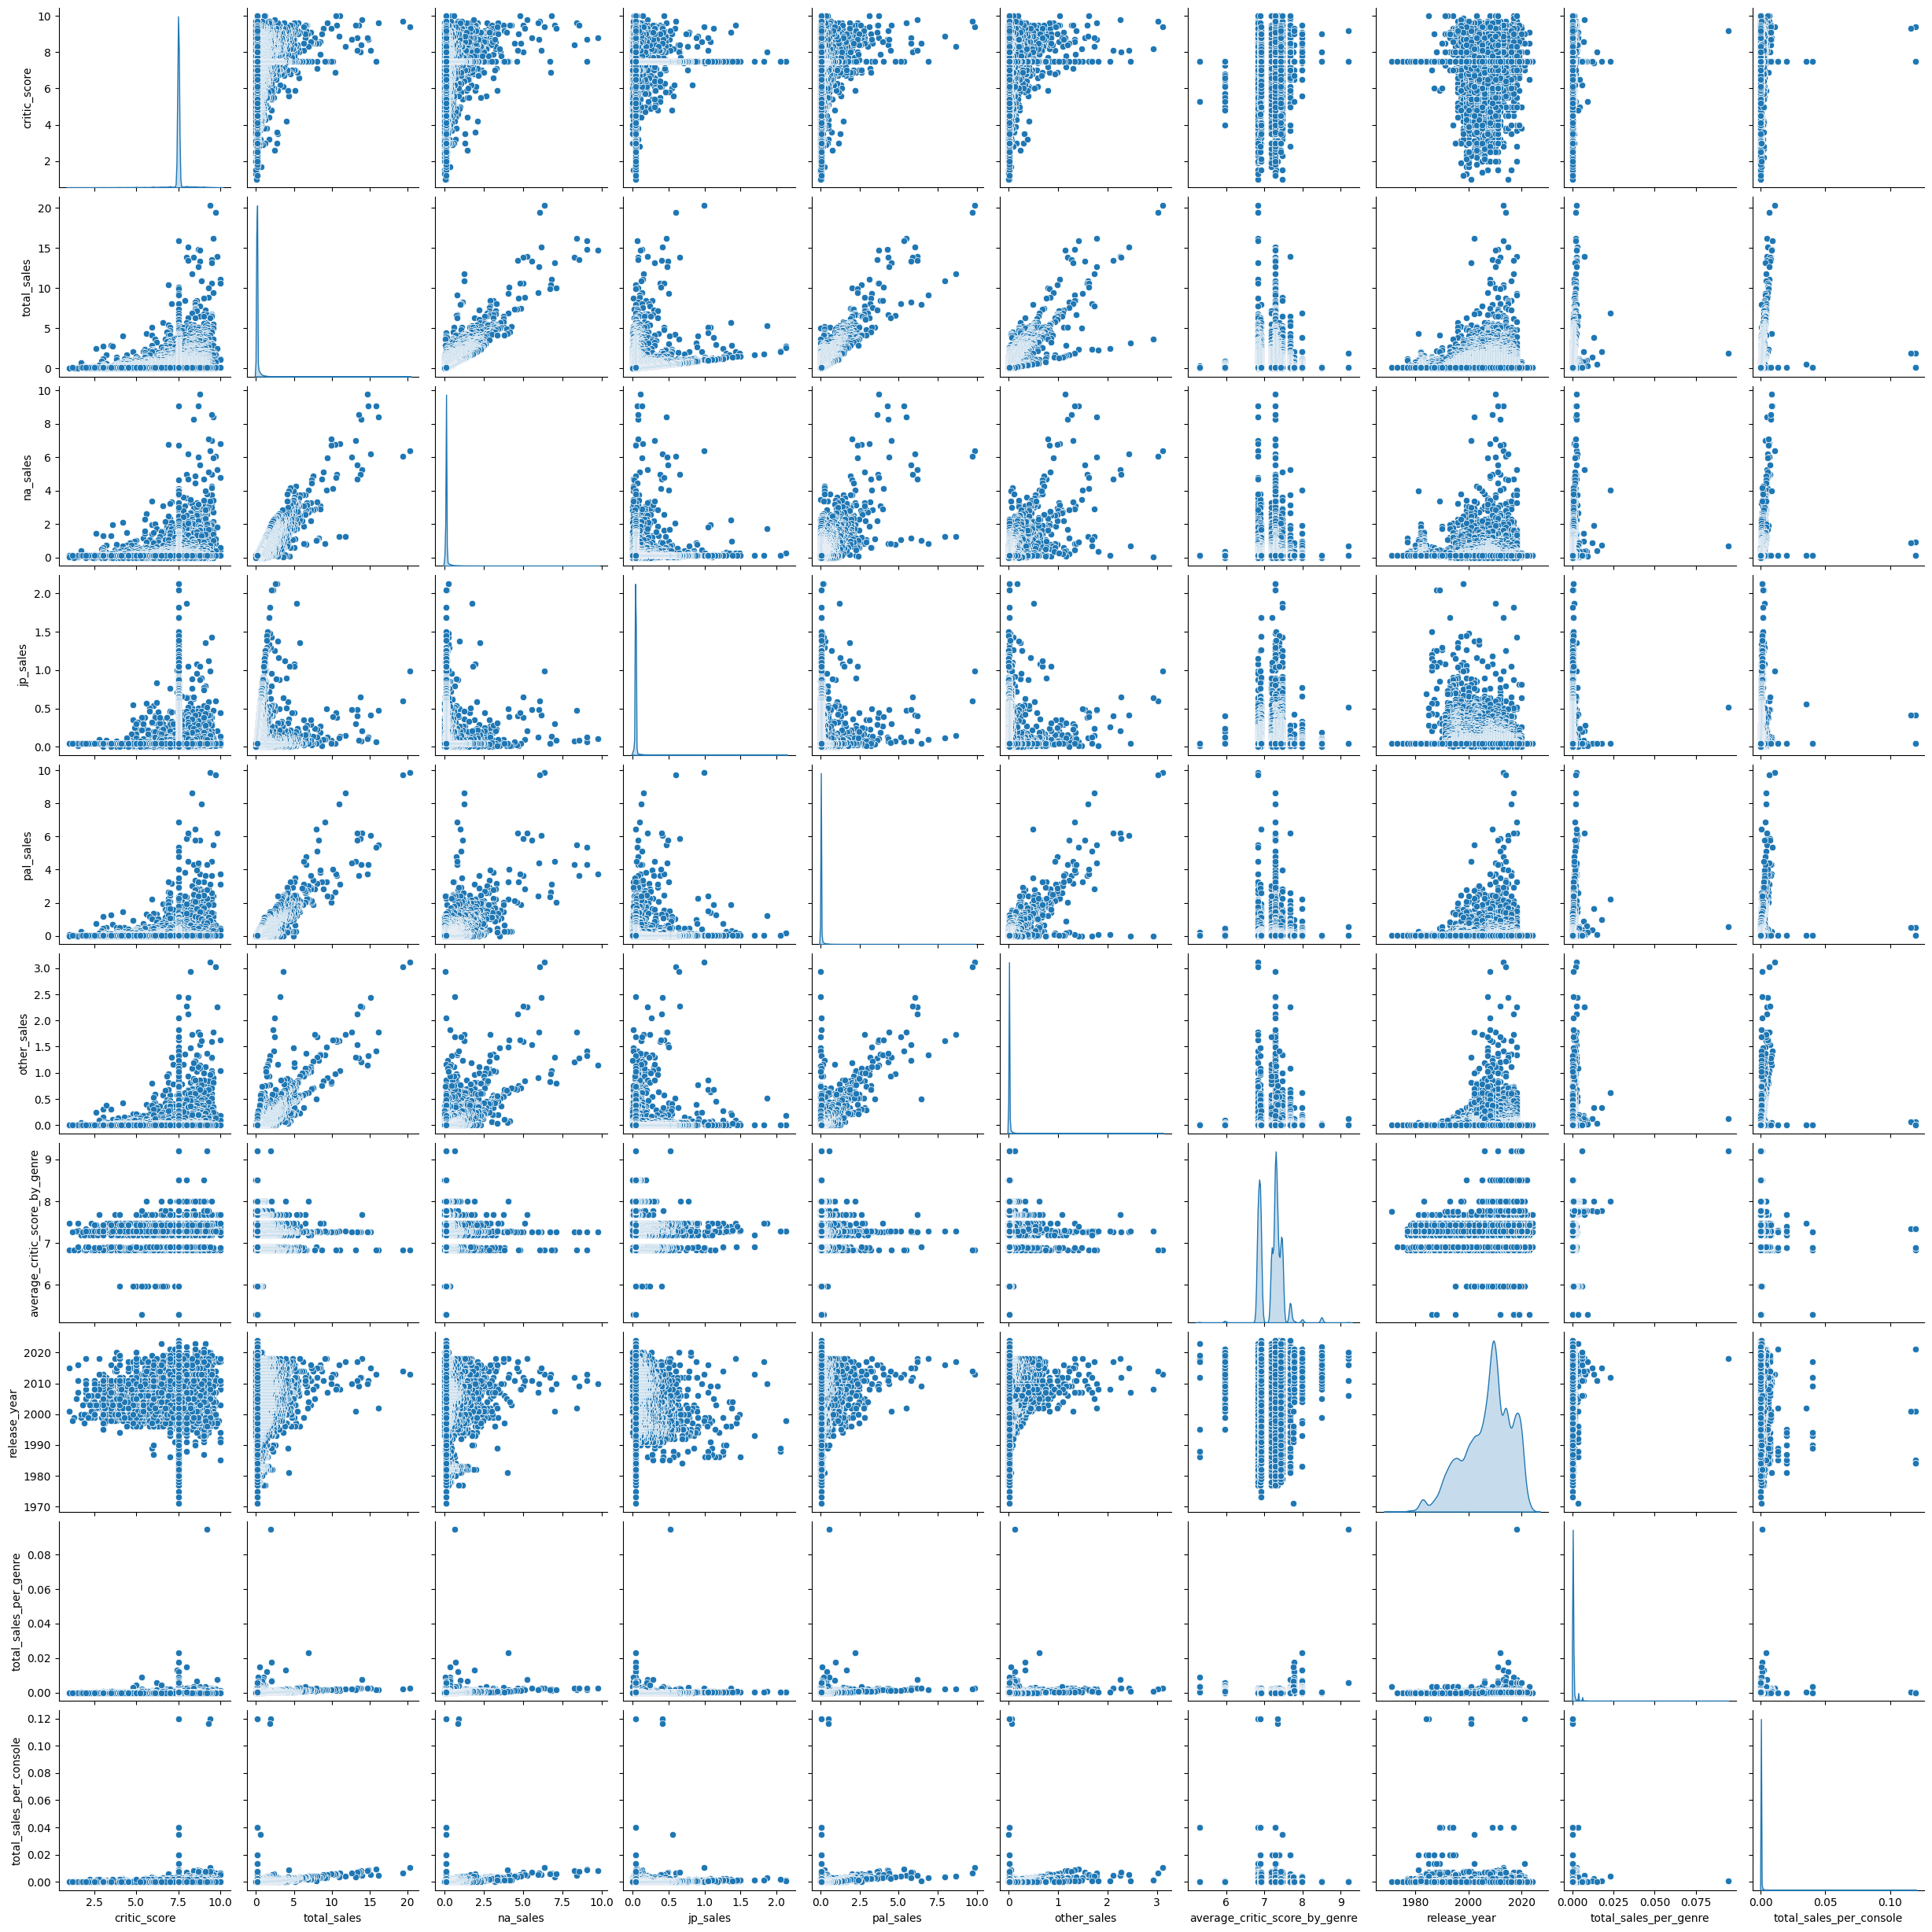

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

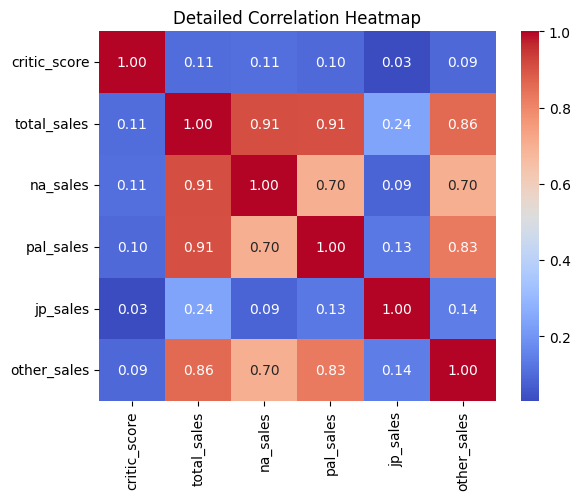

In [ ]:
sns.heatmap(df[['critic_score', 'total_sales', 'na_sales', 'pal_sales', 'jp_sales', 'other_sales']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Detailed Correlation Heatmap')
plt.show()


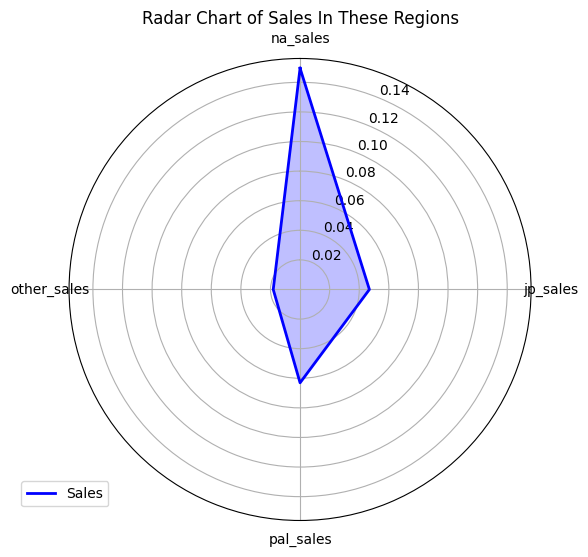

In [ ]:
from math import pi

features = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
values = df[features].mean().values
categories = features
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
values = list(values) + list(values[:1])

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid', label='Sales')
ax.fill(angles, values, color='blue', alpha=0.25)
plt.title('Radar Chart of Sales In These Regions')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()



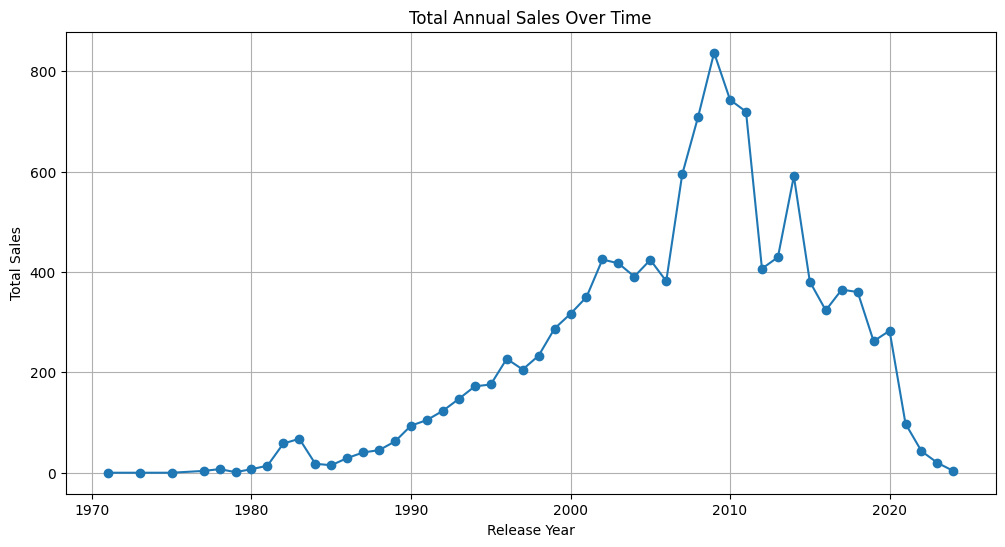

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['release_year'], yearly_sales['annual_sales'], marker='o')
plt.title('Total Annual Sales Over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()